In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pds_plots as ppl

/Users/shhong/Documents/Ines/pycabnn/notebooks/fig_POPGEN/pds_plots.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [25]:
fname = "../../test_data/generated_positions/coords_20190626_1_6.npz"
f = np.load(fname)

bbox = [[0, 700], [0-20, 700], [0, 200]]


def limit_to_box(x, box):
    mf = x.copy()
    for i, t in enumerate(box):
        mf = mf[mf[:,i]>=t[0], :]
        mf = mf[mf[:,i]<=t[1], :]
    return mf


def fix_coors(x):
    y = x-np.ones(x.shape[1])*25
    box = [bbox[0], [bbox[1][0]+20, bbox[1][1]], bbox[2]]
    return limit_to_box(y, box[:x.shape[1]])


mf = f['mf']
mf = fix_coors(mf)

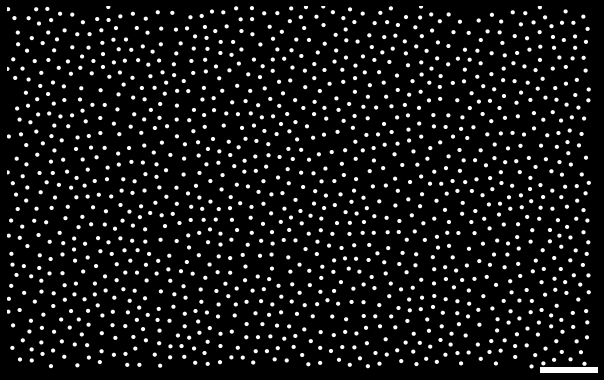

In [17]:
bbox = [[0, 1500], [0-20, 700], [0, 200]]

mf = f['mf']
mf = fix_coors(mf)

bbox = [[0, 700*8/5], [0-10, 700], [0, 200]]
bbox2 = bbox[:2]

plt.style.use('dark_background')
ax = ppl.plot_mf_1(mf, bbox2, 8/2, save=False)
ax.plot([bbox2[0][1]-100, bbox2[0][1]], [bbox2[1][0]+2.5, bbox2[1][0]+2.5], 'w', linewidth=10)
# ppl.plot_mf_2(mf, [1500, 700], save=True)
plt.tight_layout()
plt.savefig('mf.png', dpi=600)

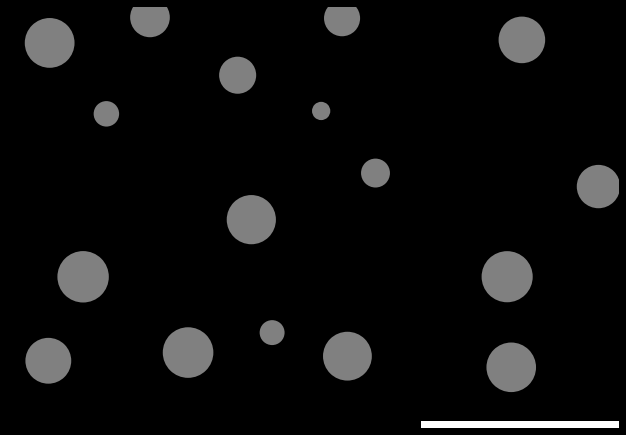

In [20]:
bbox = [[0, 200*8/5], [0-20, 200], [0, 200]]

goc = f['goc']
goc = fix_coors(goc)

plt.style.use('dark_background')

ax = ppl.plot_goc(goc, bbox, 100, 13.5)
ax.plot([bbox[0][1]-100, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)
plt.savefig('goc_topview.png', dpi=600)

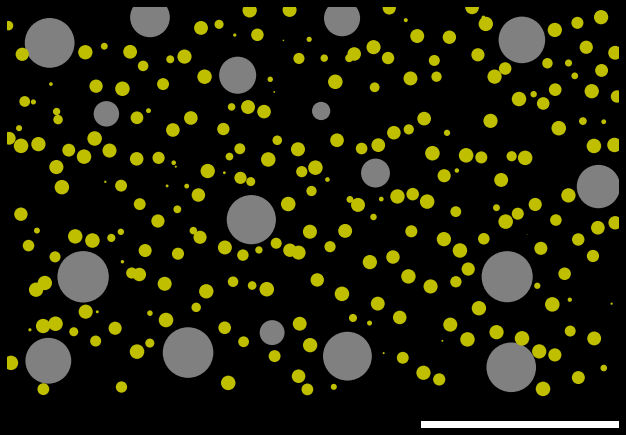

In [21]:
glo = f['glo']
glo = fix_coors(glo)

ax = ppl.plot_goc_glo((goc, 13.5), (glo, 7.6 / 2), bbox, 100)
ax.plot([bbox[0][1]-100, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)
plt.savefig('goc+glo_topview.png', dpi=600)
#         plt.savefig('goc+glo.png', dpi=300

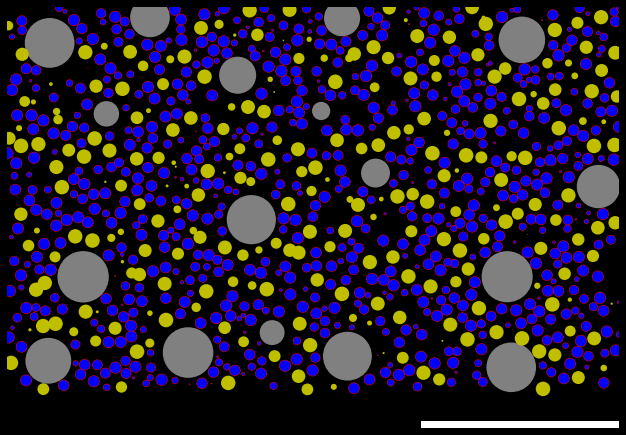

In [23]:
grc0 = f['grc_nop']
grx = grc0 + np.random.randn(*grc0.shape)*0.2
grc = fix_coors(grx)

ax = ppl.plot_all_pop(
    (goc, 13.5),
    (glo, 7.6 / 2),
    (grc, 3),
    bbox, 100)
ax.plot([bbox[0][1]-100, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)
plt.savefig('all_topview.png', dpi=300)

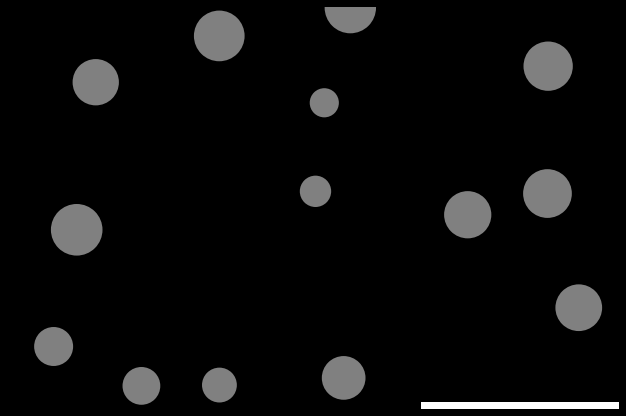

In [26]:
fname = "../../test_data/generated_positions/coords_20190626_1_6.npz"

f = np.load(fname)


bbox = [[0, 1500], [0-10, 700], [0, 200]]


mf = f['mf']
mf = fix_coors(mf)

goc = f['goc']
goc = fix_coors(goc)

glo = f['glo']
glo = fix_coors(glo)

grc0 = f['grc_nop']
grx = grc0 + np.random.randn(*grc0.shape)*0.2
grc = fix_coors(grx)



def to_saggit(x):
    y = x.copy()
    y[:,0] = x[:,1]
    y[:,1] = x[:,2]
    y[:,2] = x[:,0]    
    return y

def to_medlat(x):
    y = x.copy()
    y[:,0] = x[:,0]
    y[:,1] = x[:,2]
    y[:,2] = x[:,1]
    return y


goc1 = to_saggit(goc)
glo1 = to_saggit(glo)
grc1 = to_saggit(grc)



bbox = [[200, 200+200*8/5], [0-10, 200], [0, 500]]


ax = ppl.plot_goc(goc1, bbox, 100, 13.5)
ax.plot([bbox[0][1]-100, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)
plt.savefig('goc_sag.png', dpi=600)

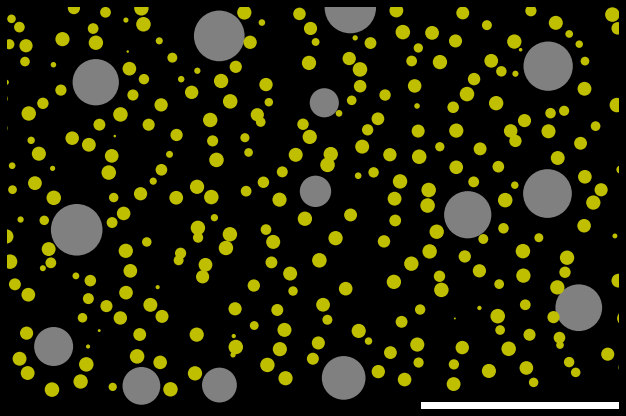

In [28]:
bbox = [[200, 200+200*8/5], [0-10, 200], [0, 500]]

ax = ppl.plot_goc_glo((goc1, 13.5), (glo1, 7.6 / 2), bbox, 100)
ax.plot([bbox[0][1]-100, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)
plt.savefig('goc+glo_sag.png', dpi=600)

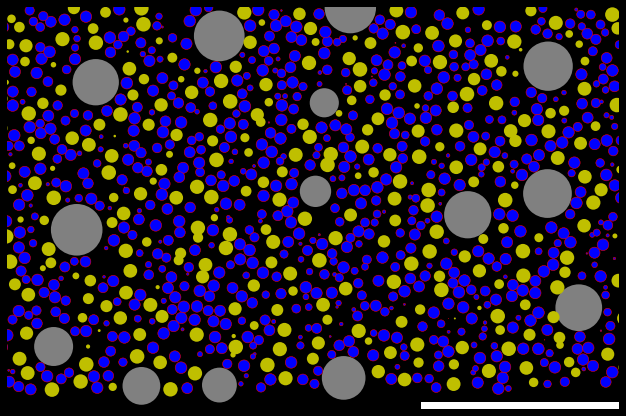

In [29]:
bbox = [[200, 200+200*8/5], [0-10, 200], [0, 500]]

ax = ppl.plot_all_pop(
    (goc1, 13.5),
    (glo1, 7.6/2),
    (grc1, 6.15/2),
    bbox, 100)
ax.plot([bbox[0][1]-100, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)
plt.savefig('all_sag.png', dpi=600)